In [2]:
#importing required libraries
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib as plt
import seaborn as sns

In [3]:
#importing crime data file
df = pd.read_csv("./20_intermediate_files/crime_rate.csv")

In [15]:
#Seprating violent and non violent into 2 dataframes
df_violent = df.loc[df["violent_crime"]== 1,:]
df_nonviolent = df.loc[df["violent_crime"]== 0,:]

In [31]:
#Using plot function created for arrest data

def plot_monthly_total_rate_trend(df: pd.DataFrame, crime_type:str):
    """
    Input: a data frame contained monthly total crime rate 
    ouput: a graph that splits 2019 and 2020 by county
    """
    # convert month from string to categorial in order to sort them 
    cat_type = CategoricalDtype(categories=[ 'JAN', 'FEB', 'MAR','APR'
                                            , 'MAY', 'JUN', 'JUL','AUG', 'SEP',
                                            'OCT', 'NOV', 'DEC',], ordered=True)

    df['month'] = df['month'].astype(cat_type).copy()
    # plot a side by side graph by different year
    g = sns.FacetGrid(df, col="DATA_YEAR", hue="fips")
    sub_str = "crime_rate"
    g.map(sns.lineplot, "month", sub_str, ci=None)
    g.set_xticklabels(rotation =45)
    g.fig.set_figwidth(10)
    g.fig.set_figheight(6)
    g.fig.suptitle('Total Crime Rate Trends of ' + ' by County (' + crime_type + ')' )
    # change the legend to more descriptive county names 
    g.fig.legend(title='County_name',
                 labels=['Adams', 'Boulder','Broomfield','Denver','El Paso'],
                loc = 'upper right')


/var/folders/01/5cwkh1qx51s66l5bqmy3qfs80000gn/T/ipykernel_13160/2058347643.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['month'].astype(cat_type).copy()


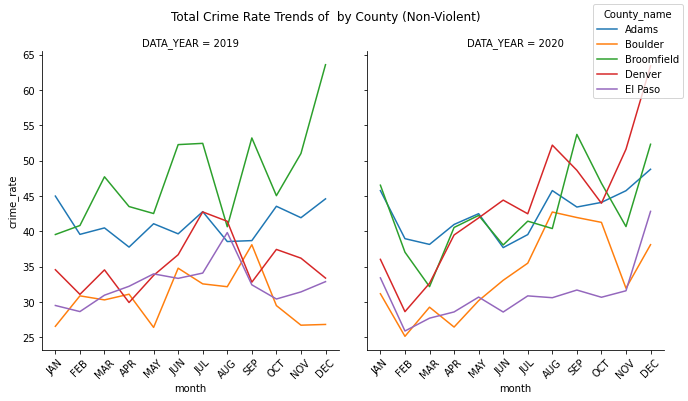

In [32]:
plot_monthly_total_rate_trend(df_nonviolent, 'Non-Violent')

/var/folders/01/5cwkh1qx51s66l5bqmy3qfs80000gn/T/ipykernel_13160/2058347643.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['month'].astype(cat_type).copy()


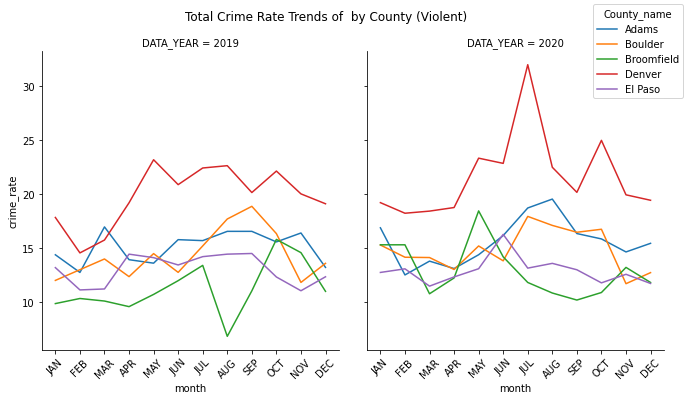

In [33]:
plot_monthly_total_rate_trend(df_violent,"Violent")